In [1]:
import json
import math
import os
import glob

import numpy as np

import cairosvg

from uuid import uuid4

from vdom.svg import circle, path, rect, svg, g as group, animate, text, clipPath

from IPython.display import display_png, Image

In [2]:
with open('heart_quads.json') as fp:
    data =json.load(fp)
quads = data['quad_points']
initial_point = data['initial_point']

In [18]:
def gen_id():
    return f"{uuid4()}".replace("-","")

def gen_heart(myid=None, stroke="red"):
    if myid is None:
        myid = gen_id()
    d = f'M{initial_point[0]},{initial_point[1]} {" ".join("Q"+",".join(map(str, (q for q in quad[0])))+" "+",".join(map(str, (q for q in quad[1]))) for quad in quads)} Z'
    my_heart = path(id=f"{myid}",
                    fill="none", 
                    stroke=stroke,
                    d=d,
                    transform = "scale(1.25 -1.25)",
                    **{"stroke-width": ".5"}
        )    
    return my_heart


In [36]:
class Flag:
    def __init__(self, name, colors, symbol=None):
        self.name = name
        self.colors = colors
        self.symbol = symbol
        self.num = len(colors)
        
    def flag(self, height_perc=73, shift=5, **kwargs):
        height_perc = height_perc
        shift = shift
        div_heights = np.linspace(-height_perc/2+shift,
                                  height_perc/2+shift, 
                                  self.num, 
                                  endpoint=False)
        internal = [rect(x="-25", y=f"{this_h}%", 
                         width="50", height=f"{height_perc/self.num}%", 
                         fill=self.colors[i],
                         stroke=self.colors[i]
                        ) 
                    for i, this_h in enumerate(div_heights)]
        if self.symbol:
            internal.append(self.symbol)
        return group(*internal, 
                     **kwargs, )
    
    def _repr_mimebundle_(self, include=None, exclude=None):
        viewer = svg(self.flag(), viewBox="-25 -25 50 50", 
                     version="1.1", baseProfile="full", width="300px", height="200px", 
                     xmlns="http://www.w3.org/2000/svg", 
                     x="0px", y="0px",
                     **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
                        "xml:space":"preserve"})
        return {**viewer._repr_mimebundle_(None, None),
                
                "text/html": viewer._repr_html_(),
                "text/svg+xml": viewer._repr_html_()
               }
    
    def encode(self, **kwargs):
        myflag = svg(self.flag(**kwargs), viewBox="-25 -25 50 50", version="1.1",
            baseProfile="full", 
            xmlns="http://www.w3.org/2000/svg", 
            **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
               "xml:space":"preserve"})
        return myflag.to_html().encode('utf-8')
    
        
    
class Clip:

    def __init__(self, *shapes, clipid="clipid", **kwargs):
        self.clipid = clipid
        self.shapes = shapes
        self.kwargs = kwargs
    
    def clipper(self):
        return clipPath(*self.shapes, 
                        **{"id":self.clipid}, **self.kwargs)
    
    def clip(self, *targets, **kwargs):
        return group(*targets, style={"clip-path":f"url(#{self.clipid})"})
    
    def show_clip(self, *targets, edge=False, clip=True, style = None, **kwargs):
        if style is not None:
            style = {}

        outline = self.shapes if edge else [""]
        to_display = [self.clip(*targets, **kwargs)] if clip else targets
        
        return svg(*to_display,
                   *outline,
                   viewBox="-25 -25 50 50", version="1.1",
            baseProfile="full", 
            xmlns="http://www.w3.org/2000/svg", 
            **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
               "xml:space":"preserve"})

    
def encode_heart(flag_def, **kwargs):
    heart_shape = Clip(gen_heart(), clipid="uniquid")
    heart = svg(heart_shape.clipper(),
                heart_shape.clip(Flag(**flag_def).flag()),
                viewBox="-25 -25 50 50", 
                version="1.1",
            baseProfile="full", 
            xmlns="http://www.w3.org/2000/svg", 
            **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
               "xml:space":"preserve"}) 

    return heart.to_html().encode('utf-8')

def encode_flag(flag_def, **kwargs):
    return Flag(**flag_def).encode()

def write_pngs(flag_defs, base_dir=None, suffix="heart", encoder=None):
    if encoder is None:
        encoder = encode_heart
    if base_dir is None:
        base_dir = os.path.join("images", "pngs")

    for flag in flag_defs:
        with open(f"{os.path.join(base_dir,flag['name'])}-{suffix}.png", 'wb') as fp:
            fp.write(cairosvg.svg2png(encoder(flag), dpi=300, parent_width=400, parent_height=400))


In [37]:
import IPython.display


In [38]:
IPython.display.SVG

IPython.core.display.SVG

In [39]:
heart_coords = [
    {'x': "60", "y":"0"},
    {'x': "180", "y":"0"},
    {'x': "345", "y":"0"},
    {'x': "465", "y":"0"},
    {'x': "0", "y":"120"},
    {'x': "130", "y":"120"},
    {'x': "260", "y":"120"},
    {'x': "390", "y":"120"},
    {'x': "520", "y":"120"},
    {'x': "40", "y":"240"},
    {'x': "185", "y":"240"},
    {'x': "335", "y":"240"},
    {'x': "480", "y":"240"},
    {'x': "170", "y":"360"},
    {'x': "355", "y":"360"},
    {'x': "260", "y":"480"},
]

In [40]:
# %%writefile flag_spec.py
trans = {"colors":['lightskyblue', 'lightpink', 'white',  'lightpink', 'lightskyblue'],
         "name":"trans",}

intersex = {"colors":["gold"],
            "name": "intersex",}
intersex['symbol'] = circle(cx="0", cy="2", r="5", fill="transparent", 
                            stroke="purple", **{"stroke-width":"2.5"})

genderqueer = {"colors":['purple', 'white', 'forestgreen'],
               "name": "genderqueer",}

pride = {"colors":['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'], 
         "name": "pride",}

agender = {"colors":['black', 'lightgrey', 'white', 'chartreuse', 'white', 'lightgrey', 'black'],
           "name": "agender",}

ace = {"colors":['black','lightgrey','white', 'purple'], 
       "name": "asexual", }

bi = {"colors":['deeppink', 'deeppink', 'mediumpurple', 'blue','blue'],
      "name": "bi",}

enby = {"colors":['#ffef00', 'white', '#9C59D1', 'black'], 
        "name": "enby",}

genderfluid = {"colors":['#ff75a2', "white","#be18d6", 'black', 'mediumblue'],
               "name": "genderfluid",}

pansexual = {"colors":['deeppink', "gold", "deepskyblue"],
             "name": "pansexual",}

polysexual = {"colors":["#f61cb9", "#07d569", 'dodgerblue'],
              "name": "polysexual",}

aromantic = {"colors":["#3da542", "#a7d379", "white", "lightgrey", "black"],
             "name": "aromantic",}

lipstick = {"colors":["#A60061", "#B95393", "#D260A7", "#EDEDEB", "#E5ABD0", "#C74D52", "#8C1D00"], 
            "name": "lipstick",}



polyamory = {"colors":["blue", "red", "black"],
             "name": "polyamory",}

bear = {"colors": ["#623804", "chocolate", "#fedd63", "moccasin", "white", "dimgray", "black"], 
        "name": "bear",}

lesbian = {"colors":["purple"],
           "name": "lesbian",}

polyamory['symbol'] = text("π", y="4.5", fill="yellow", 
                           **{'text-anchor': "middle", "font-family": "Minion Pro", "font-size":"15"})
bear['symbol'] = path(d="M98.9 24.4c-5.7 0-11.5 1.3-16.3 4.4C61.2 42.6 91.1 48.3 96 51.1c4.7 2.7 22.4 22.9 29.7-8.4 2.2-9.7-12.2-18.3-26.8-18.3m45.4 11.2c-17.7 1.9-.8 43 23.6 44.4 16.5.9 28.9-39.3-23.6-44.4m-94.4 8.9C34.2 44 43.7 73.3 69 83.6c5.1 2.1 14.2-4.7 14.4-16 .1-4.2-7.1-22.2-33.5-23.1m61 17.7c-7.1-.1-14.6 3-22.8 11.5-28.9 30.3 13.8 35.5 10.6 51.9-9.7 48.5-.9 52.5 8.3 55.6 11.7 3.9 33.8-33.4 43.1-40.4 12.4-9.4 77.9-42.2 62.4-58.8-22.3-23.8-27 7.3-57.7-1-14.6-3.9-28.3-18.8-43.9-18.8M54.4 96.5c-2.8-.1-5.5.4-8.1 1.6-11.5 5.2 10.8 36.5 20.9 37.4 12.4 1.1 17.4-8.9 17.6-14.7.3-7.6-15.4-24-30.4-24.3m4 46.7c-4.5.1-8 1.2-9.6 3.3-4.1 6.2 21.6 30.4 28.7 32 6.5 1.5 12.6-13 11.4-18.7-2.2-10.4-19.2-16.7-30.5-16.6",
                      transform = "scale(.08 .08) translate(-120,-80) ") 
lesbian['symbol'] = group(path(d="M500 550L211.325 50h577.35z", fill="black"),
                          path(d="M479.667 132.374a162.687 162.687 0 0 1-108.732-62.373 162.687 162.687 0 0 0 0 198.075 162.687 162.687 0 0 1 108.732-62.373zm40.672 73.329a162.687 162.687 0 0 1 108.732 62.373 162.687 162.687 0 0 0 0-198.075 162.687 162.687 0 0 1-108.732 62.373zm-4.067-91.571a16.269 8.134 0 0 0-32.538 0v347.743a16.269 8.134 0 0 0 32.538 0z", 
                               fill="white"), 
                          transform = "scale(.04, .04) translate(-500 -150)")

demigirl = {"colors":["darkgrey", "lightgrey", "lightpink","white", "lightpink", "lightgrey", "darkgrey"], "name": "demigirl"}
demiboy = {"colors":["darkgrey", "lightgrey", "lightblue","white", "lightblue", "lightgrey", "darkgrey"], "name": "demiboy"}

flag_defs = [trans, lesbian, bear, agender, ace, bi, pride, enby, genderfluid, pansexual, polysexual, aromantic, lipstick, genderqueer, intersex, polyamory]

In [41]:
heart = Clip(gen_heart(), clipid="newid")
flag_list = [heart.clipper()]
coord_list = []

for idx, flag_def in enumerate(flag_defs):
    x = f"{heart_coords[idx]['x']}"
    y = f"{int(heart_coords[idx]['y'])+50}"
    flag = Flag(**flag_def)
    flag_list.append(
        svg(
            text(flag.name, y=f"{-20}", **{'text-anchor': "middle", "font-family": "Minion Pro", "font-size":"15"}),
            heart.clip(
                flag.flag(),
            ), 
            x = x,
            y = y,
            height="100px",
            viewBox="-25 -25 50 50",
            style={"overflow":"visible"},
            version="1.1",
            baseProfile="full", 
            xmlns="http://www.w3.org/2000/svg", 
            **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
               "xml:space":"preserve"}
        )
    )    
heart_array = svg(*flag_list, width=f"{90*8}", viewBox="250 0 675 675", 
                  version="1.1", baseProfile="full", 
                  xmlns="http://www.w3.org/2000/svg", 
                  **{"xmlns:xlink":"http://www.w3.org/1999/xlink", 
                        "xml:space":"preserve"})
display(heart_array)

<svg baseProfile="full" version="1.1" viewBox="250 0 675 675" width="720" xml:space="preserve" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><clipPath id="newid"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179

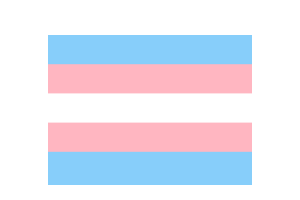

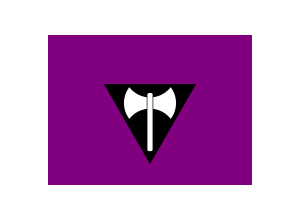

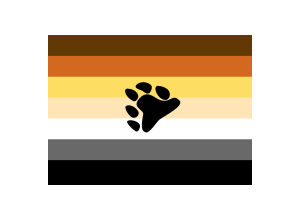

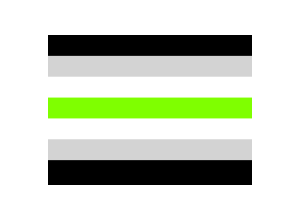

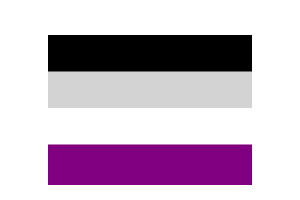

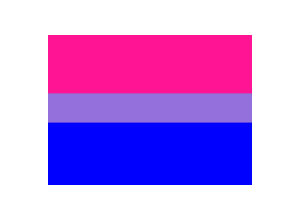

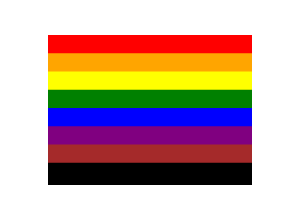

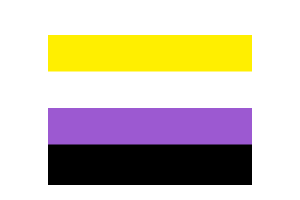

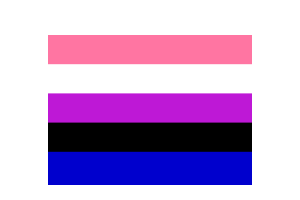

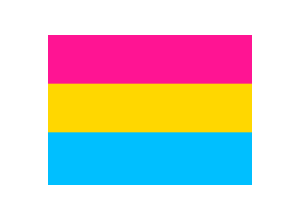

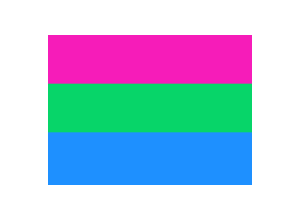

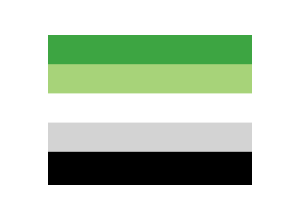

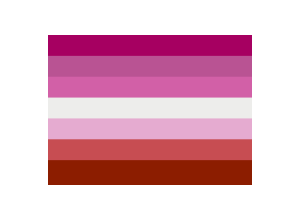

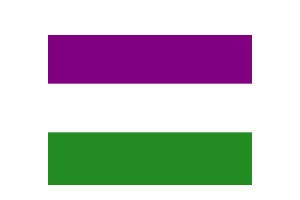

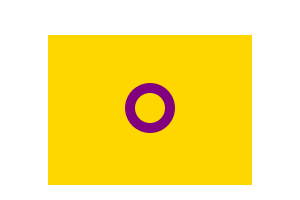

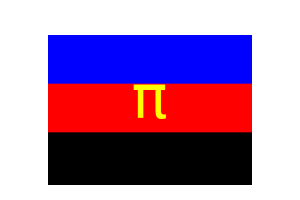

In [10]:
for idx, flag_def in enumerate(flag_defs):
    flag = Flag(**flag_def)
    display(IPython.display.SVG(flag._repr_mimebundle_(None,None)['text/html']), metadata={"filename": flag_def['name']})


In [42]:

with open("heart_array.png", 'wb') as fp:
    fp.write(cairosvg.svg2png(heart_array.to_html().encode('utf-8'), dpi=300, parent_width=400, parent_height=400))


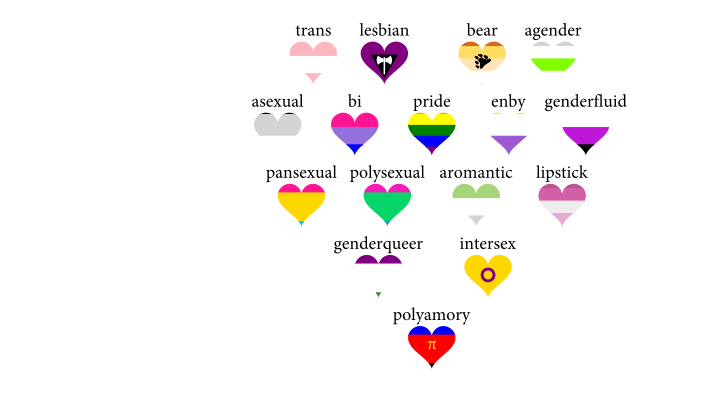

In [43]:
from IPython.display import Image

Image("heart_array.png")

In [ ]:
%load flag_spec.py


In [ ]:
# %%writefile flag_spec.py
trans = {"colors":['lightskyblue', 'lightpink', 'white',  'lightpink', 'lightskyblue'],
         "name":"trans",}

intersex = {"colors":["gold"],
            "name": "intersex",}
intersex['symbol'] = circle(cx="0", cy="2", r="5", fill="transparent", 
                            stroke="purple", **{"stroke-width":"2.5"})

genderqueer = {"colors":['purple', 'white', 'forestgreen'],
               "name": "genderqueer",}

pride = {"colors":['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'], 
         "name": "pride",}

agender = {"colors":['black', 'lightgrey', 'white', 'chartreuse', 'white', 'lightgrey', 'black'],
           "name": "agender",}

ace = {"colors":['black','lightgrey','white', 'purple'], 
       "name": "asexual", }

bi = {"colors":['deeppink', 'deeppink', 'mediumpurple', 'blue','blue'],
      "name": "bi",}

enby = {"colors":['#ffef00', 'white', '#9C59D1', 'black'], 
        "name": "enby",}

genderfluid = {"colors":['#ff75a2', "white","#be18d6", 'black', 'mediumblue'],
               "name": "genderfluid",}

pansexual = {"colors":['deeppink', "gold", "deepskyblue"],
             "name": "pansexual",}

polysexual = {"colors":["#f61cb9", "#07d569", 'dodgerblue'],
              "name": "polysexual",}

aromantic = {"colors":["#3da542", "#a7d379", "white", "lightgrey", "black"],
             "name": "aromantic",}

lipstick = {"colors":["#A60061", "#B95393", "#D260A7", "#EDEDEB", "#E5ABD0", "#C74D52", "#8C1D00"], 
            "name": "lipstick",}



polyamory = {"colors":["blue", "red", "black"],
             "name": "polyamory",}

bear = {"colors": ["#623804", "chocolate", "#fedd63", "moccasin", "white", "dimgray", "black"], 
        "name": "bear",}

lesbian = {"colors":["purple"],
           "name": "lesbian",}

polyamory['symbol'] = text("π", y="4.5", fill="yellow", 
                           **{'text-anchor': "middle", "font-family": "Minion Pro", "font-size":"15"})
bear['symbol'] = path(d="M98.9 24.4c-5.7 0-11.5 1.3-16.3 4.4C61.2 42.6 91.1 48.3 96 51.1c4.7 2.7 22.4 22.9 29.7-8.4 2.2-9.7-12.2-18.3-26.8-18.3m45.4 11.2c-17.7 1.9-.8 43 23.6 44.4 16.5.9 28.9-39.3-23.6-44.4m-94.4 8.9C34.2 44 43.7 73.3 69 83.6c5.1 2.1 14.2-4.7 14.4-16 .1-4.2-7.1-22.2-33.5-23.1m61 17.7c-7.1-.1-14.6 3-22.8 11.5-28.9 30.3 13.8 35.5 10.6 51.9-9.7 48.5-.9 52.5 8.3 55.6 11.7 3.9 33.8-33.4 43.1-40.4 12.4-9.4 77.9-42.2 62.4-58.8-22.3-23.8-27 7.3-57.7-1-14.6-3.9-28.3-18.8-43.9-18.8M54.4 96.5c-2.8-.1-5.5.4-8.1 1.6-11.5 5.2 10.8 36.5 20.9 37.4 12.4 1.1 17.4-8.9 17.6-14.7.3-7.6-15.4-24-30.4-24.3m4 46.7c-4.5.1-8 1.2-9.6 3.3-4.1 6.2 21.6 30.4 28.7 32 6.5 1.5 12.6-13 11.4-18.7-2.2-10.4-19.2-16.7-30.5-16.6",
                      transform = "scale(.08 .08) translate(-120,-80) ") 
lesbian['symbol'] = group(path(d="M500 550L211.325 50h577.35z", fill="black"),
                          path(d="M479.667 132.374a162.687 162.687 0 0 1-108.732-62.373 162.687 162.687 0 0 0 0 198.075 162.687 162.687 0 0 1 108.732-62.373zm40.672 73.329a162.687 162.687 0 0 1 108.732 62.373 162.687 162.687 0 0 0 0-198.075 162.687 162.687 0 0 1-108.732 62.373zm-4.067-91.571a16.269 8.134 0 0 0-32.538 0v347.743a16.269 8.134 0 0 0 32.538 0z", 
                               fill="white"), 
                          transform = "scale(.04, .04) translate(-500 -150)")

flag_defs = [, trans, lesbian, bear, agender, ace, bi, pride, enby, genderfluid, pansexual, polysexual, aromantic, lipstick, genderqueer, intersex, polyamory]

In [ ]:
!rm images/pngs/*

In [ ]:
write_pngs(flag_defs, suffix="flag", encoder=lambda x: Flag(**x).encode())
write_pngs(flag_defs, suffix="heart")

In [ ]:
ls images/pngs

In [ ]:
for f in sorted(glob.glob(os.path.join("..",'hearts_full_of_pride', "images", "pngs","*"))):
    display(Image(filename=f), f)

In [ ]:

anim_style = style("""#blargh {
    stroke-dasharray: 400;
    stroke-dashoffset: 400;
    animation: dash 10s linear forwards;
    animation-delay: 2s
    }
    @keyframes dash {
      to {
        stroke-dashoffset: 100;
      }
    }
""")

start_anim = animate(attributeName="startOffset", 
                         dur=f"2s", 
                         repeatCount="indefinite",
                         begin="0s",
                         **{"from": "0%",
                            "to": "100%"}
                     ) 
fade_out =  animate(id="animation1",
             attributeName="opacity",
                dur="3s",
                begin="6s",
                fill="freeze",
             **{"from":"1", "to":"0" })


def animated_heart():
    return group(gen_heart("blargh", stroke="white"),anim_style)

heart = Clip(gen_heart())

In [ ]:
svg(heart.clipper(), 
    heart.clip(
        Flag(**rainbow).flag()
    ),
    group(Flag(**rainbow).flag(**{"id": "myflag"}), 
          animated_heart(),
          fade_out),
    viewBox="-25 -25 50 50",
    height = "450"
   )
